In [273]:
%load_ext autoreload
%autoreload 2

import itertools
import sys

if "../src" not in sys.path:
    sys.path.append("../src")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import laplace

from lib_canonical import find_breakpoint
from lib_fit_models import simulate_trajectories_using_mode_regression, simulate_trajectories_using_fixed_mode, sample_trunc_laplace

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [345]:
colors = ['#EF476F', '#118AB2', '#06D6A0', '#073B4C', '#FFD166']
sns.set_palette(colors)

sns.set_context("talk")

In [281]:
def make_parameters(alpha1, alpha2):
    return [
        {'cutoffs': (4, ), 'cutoff_start': 0, 'cutoff_end': 4, 'alpha': alpha1},
        {'cutoffs': (4, ), 'cutoff_start': 4, 'cutoff_end': np.inf, 'alpha': alpha2},
    ]


def prop_trajectories_canonical(trajectories):
    breakpoints = np.array(find_breakpoints_vectorized(trajectories.T)).T
    
    num_canonical = 0

    for tstar, m1, m2 in breakpoints:
        if tstar == -1:
            continue

        num_canonical += (m1 > 0 and m2 < 0 and m1 > -2*m2 and tstar < 10)

    prop_canonical = num_canonical / trajectories.shape[1]
    
    return prop_canonical


def marker_settings(edgecolor, markersize=10):
    return dict(marker='o', markerfacecolor='white', markeredgecolor=edgecolor, markersize=markersize, markeredgewidth=2)

    
def plot_trajectories(ax, trajs, label='Simulation', estimator=np.mean, linestyle='--', color=None, markersize=10):
    
    if color:
        extra_settings = marker_settings(color)
    else:
        extra_settings = dict(marker='o', markersize=markersize)
    
    total_years = 20
    sns.lineplot(x=itertools.chain(*[itertools.repeat(i, trajs.shape[1]) for i in range(total_years + 1)]), y=trajs.flatten(), estimator=estimator, label=label, ax=ax, linestyle=linestyle, lw=4, **extra_settings)
    

find_breakpoints_vectorized = np.vectorize(find_breakpoint, signature='(n)->(),(),()')

In [265]:
lowest_alpha = 0.1
highest_alpha = 5
steps = 20

interval = np.linspace(lowest_alpha, highest_alpha, steps)
alpha_grid = list(itertools.product(interval, interval))

In [266]:
global_mode = 0.646
alpha_q0 = 4.65

results = []

for alpha1, alpha2 in alpha_grid:
    trajectories = simulate_trajectories_using_mode_regression(make_parameters(alpha1, alpha2), alpha_q0, global_mode=global_mode, n=400)
    prop_canonical = prop_trajectories_canonical(trajectories)
    
    results.append((alpha1, alpha2, prop_canonical))

Text(50.722222222222214, 0.5, '$\\alpha_2$')

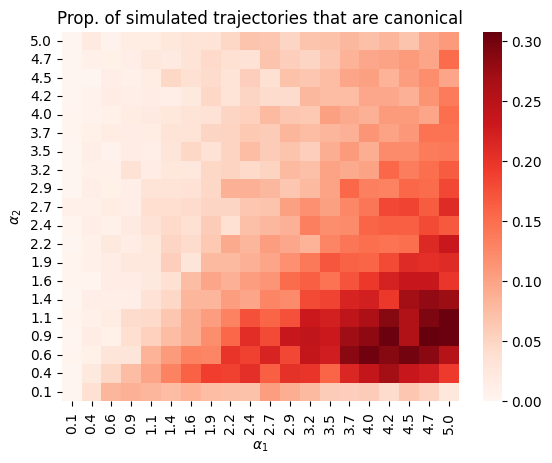

In [268]:
df_results = pd.DataFrame(results, columns=['x', 'y', 'value'])
df_results['x'] = df_results['x'].round(1)
df_results['y'] = df_results['y'].round(1)

df_results_pivot = df_results.pivot(index='y', columns='x', values='value').sort_index(level=0, ascending=False)
sns.heatmap(df_results_pivot, cmap='Reds')
#contours = plt.contour(df_results_pivot, levels=[0.1, 0.2, 0.3], colors='k')
#plt.clabel(contours, fmt='%2.1f', colors='k')
plt.title("Prop. of simulated trajectories that are canonical")
plt.xlabel("$\\alpha_1$")
plt.ylabel("$\\alpha_2$")

In [336]:
lowest_alpha_fixed = 0.1
highest_alpha_fixed = 5
steps = 20
global_mode_fixed = -1

interval_fixed = np.linspace(lowest_alpha_fixed, highest_alpha_fixed, steps)
alpha_grid_fixed = list(itertools.product(interval_fixed, interval_fixed))

results_fixed = []

for alpha1, alpha2 in alpha_grid_fixed:
    trajectories = simulate_trajectories_using_fixed_mode(make_parameters(alpha1, alpha2), alpha_q0, global_mode=global_mode_fixed, n=400)
    prop_canonical = prop_trajectories_canonical(trajectories)
    
    results_fixed.append((alpha1, alpha2, prop_canonical))

Text(120.12500000000001, 0.5, '$\\alpha_2$')

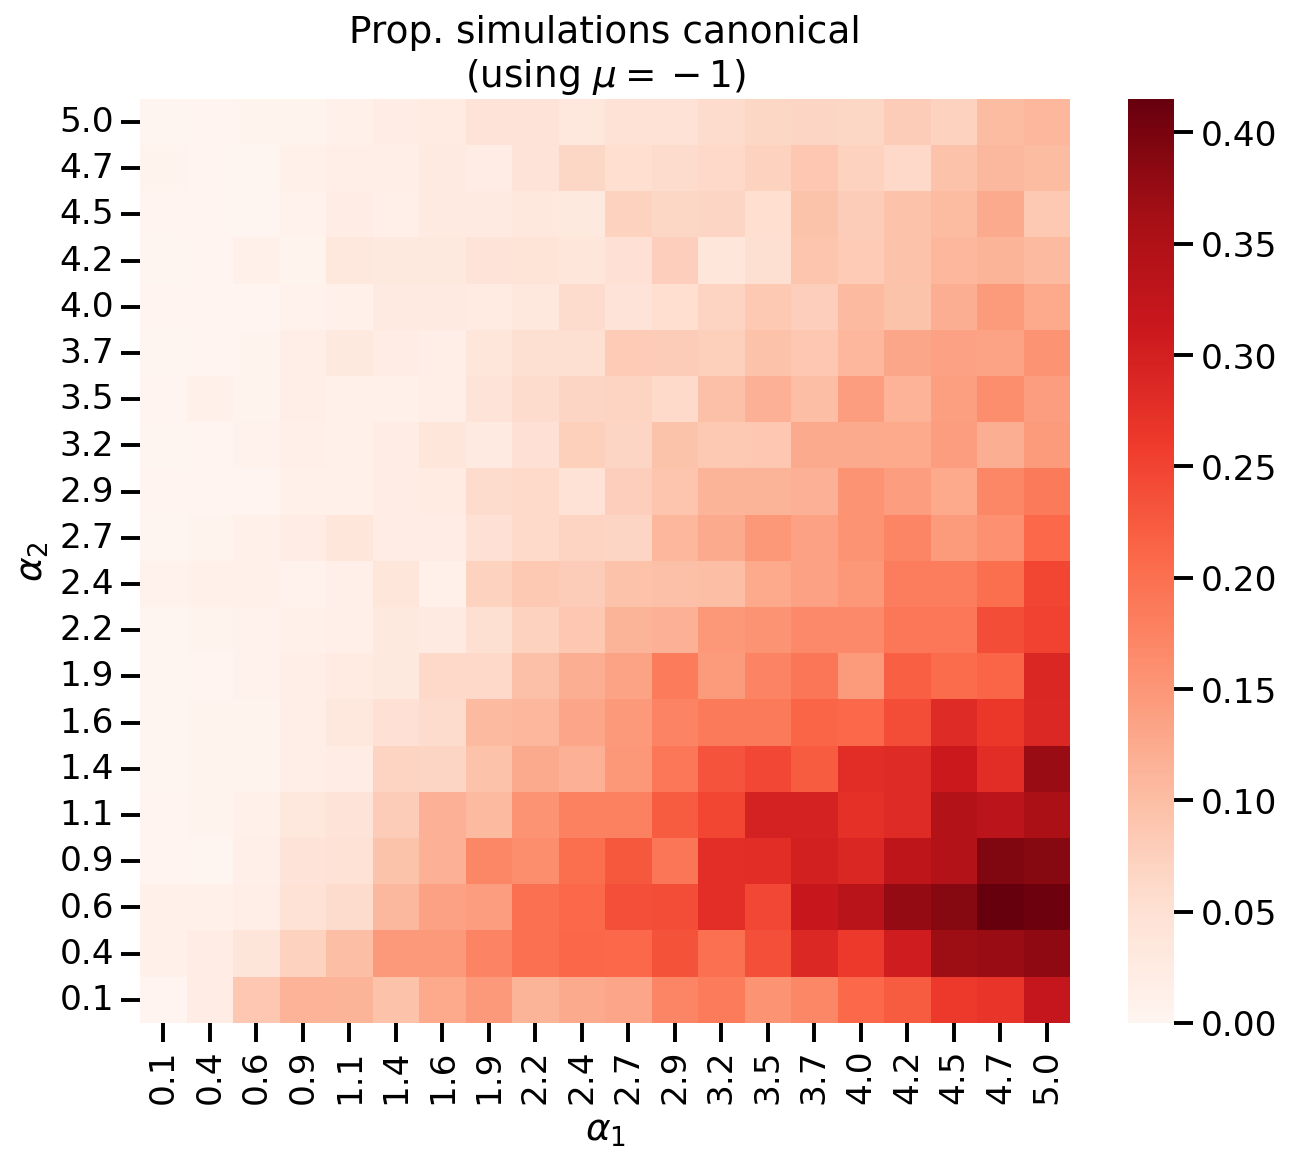

In [358]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=150)

df_results_fixed = pd.DataFrame(results_fixed, columns=['x', 'y', 'value'])
df_results_fixed['x'] = df_results_fixed['x'].round(1)
df_results_fixed['y'] = df_results_fixed['y'].round(1)

df_results_fixed_pivot = df_results_fixed.pivot(index='y', columns='x', values='value').sort_index(level=0, ascending=False)
sns.heatmap(df_results_fixed_pivot, cmap='Reds', ax=ax)
#contours = plt.contour(df_results_pivot, levels=[0.1, 0.2, 0.3], colors='k')
#plt.clabel(contours, fmt='%2.1f', colors='k')
ax.set_title("Prop. simulations canonical\n(using $\mu=-1$)")
ax.set_xlabel("$\\alpha_1$")
ax.set_ylabel("$\\alpha_2$")

Text(120.12500000000001, 0.5, '$\\alpha_2$')

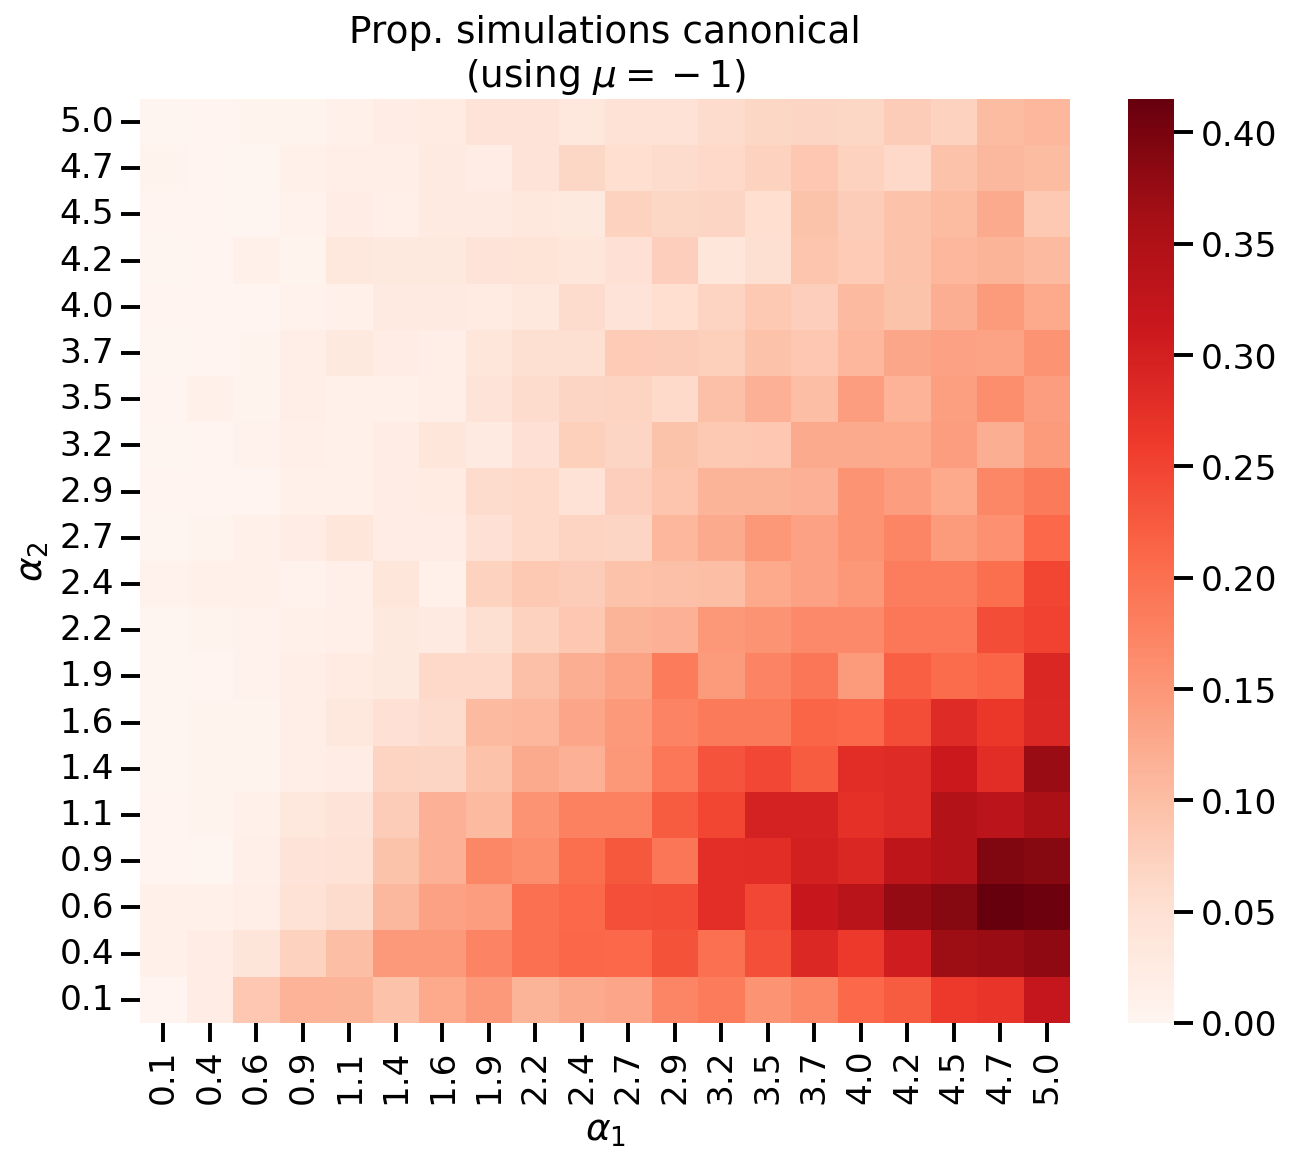

In [349]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=150)

df_results_fixed = pd.DataFrame(results_fixed, columns=['x', 'y', 'value'])
df_results_fixed['x'] = df_results_fixed['x'].round(1)
df_results_fixed['y'] = df_results_fixed['y'].round(1)

df_results_fixed_pivot = df_results_fixed.pivot(index='y', columns='x', values='value').sort_index(level=0, ascending=False)
sns.heatmap(df_results_fixed_pivot, cmap='Reds', ax=ax)
#contours = plt.contour(df_results_pivot, levels=[0.1, 0.2, 0.3], colors='k')
#plt.clabel(contours, fmt='%2.1f', colors='k')
ax.set_title("Prop. simulations canonical\n(using $\mu=-1$)")
ax.set_xlabel("$\\alpha_1$")
ax.set_ylabel("$\\alpha_2$")

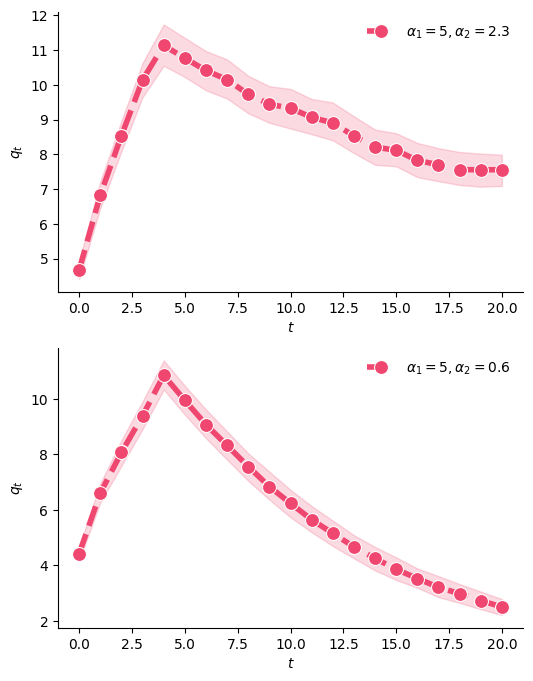

In [298]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

ax = axes[0]


plot_trajectories(ax, simulate_trajectories_using_fixed_mode(make_parameters(5, 2.3), alpha_q0, global_mode=global_mode_fixed, n=1000), label="$\\alpha_1=5, \\alpha_2=2.3$")
ax.set_xlabel("$t$")
ax.set_ylabel("$q_t$")
ax.legend(frameon=False)

ax = axes[1]

plot_trajectories(ax, simulate_trajectories_using_fixed_mode(make_parameters(5, 0.6), alpha_q0, global_mode=global_mode_fixed, n=1000), label="$\\alpha_1=5, \\alpha_2=0.6$")
ax.set_xlabel("$t$")
ax.set_ylabel("$q_t$")
ax.legend(frameon=False)

sns.despine()

Second plot: $q_t$ vs $\delta_t$ for a fixed global value of $\beta$ and two possible values of $\alpha$.

In [255]:
def trunc_laplace_expectation(alpha, k):
    exp_term = np.exp(-k/alpha)
    return alpha * (2*k/alpha + exp_term) / (2 - exp_term)

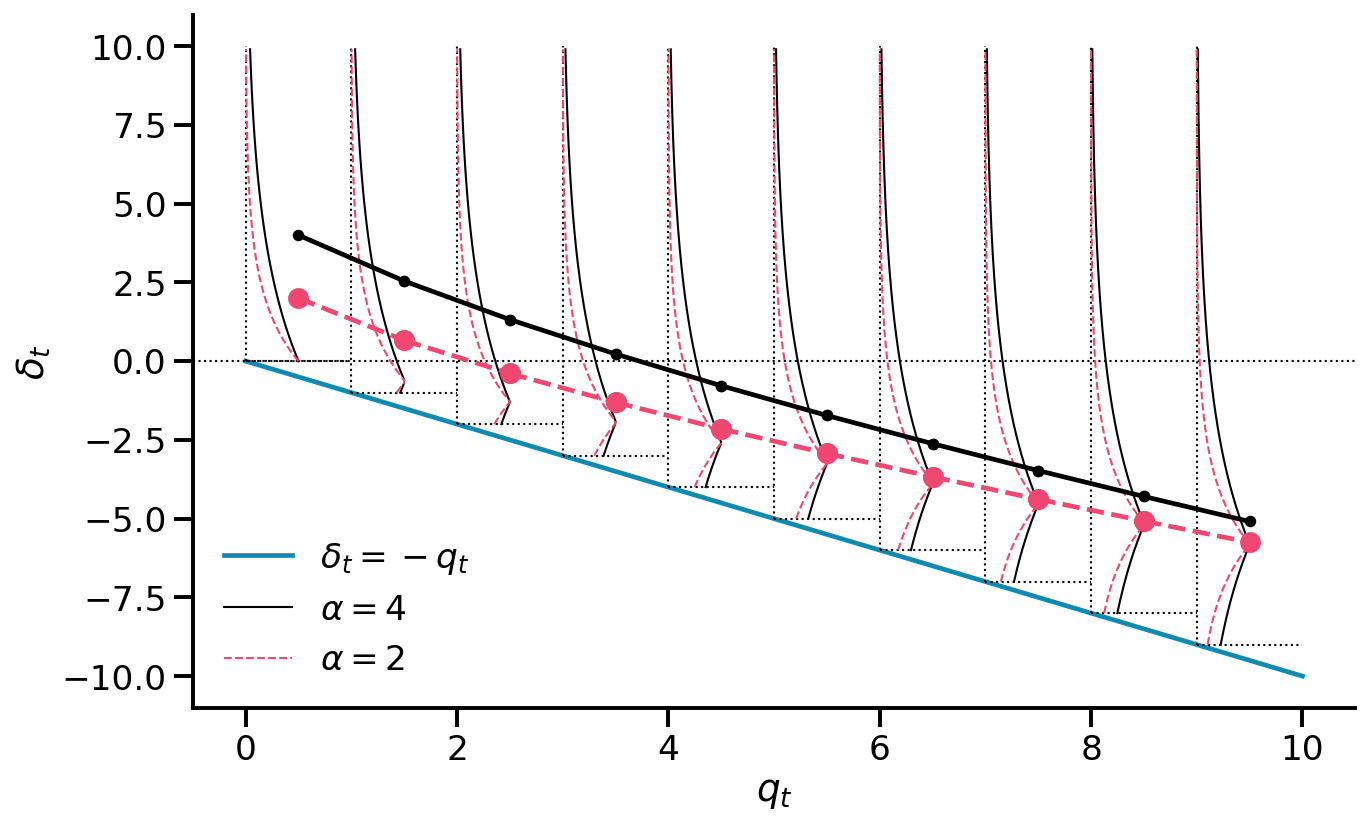

In [353]:
#q_t = np.linspace(0, 20, 3)

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=150)


upper = 10
step = 1

intervals = np.arange(0, upper, step)


ax.plot([0, step*(upper // step)], [0, -step*(upper // step)], color=colors[1], label="$\\delta_t = -q_t$")
ax.vlines(intervals, ymin=-intervals, ymax=upper, linestyle='dotted', lw=1, color='black')
ax.axhline(0, color='black', lw=1, linestyle='dotted')

ax.hlines(-intervals, xmin=intervals, xmax=intervals + step, color='black', lw=1, linestyle='dotted')


last_mu1 = None
last_mu2 = None

for interval in intervals:
    rv = laplace(loc=-interval*global_mode, scale=4)
    x = np.arange(-interval, upper, 0.1)
    y = rv.pdf(x)
    mu1 = -global_mode * interval + trunc_laplace_expectation(4, interval) - interval

    label1 = None
    label2 = None
    if interval == 0:
        label1 = "$\\alpha=4$"
        label2 = "$\\alpha=2$"
    ax.plot(interval + y / y.max() * step/2, x, color='black', lw=1, label=label1)

    rv = laplace(loc=-interval*global_mode, scale=2)
    y2 = rv.pdf(x)
    mu2 = -global_mode * interval + trunc_laplace_expectation(2, interval) - interval

    ax.plot(interval + y2 / y2.max() * step/2, x, color=colors[0], lw=1, linestyle='dashed', label=label2)
    
    # plot means
    #ax.hlines(mu1, xmin=interval + 2*step/3, xmax=interval + 2.5*step/3, color='black', lw=2)
    #ax.hlines(mu2, xmin=interval + 2*step/3, xmax=interval + 2.5*step/3, color=colors[0], linestyle='dashed', lw=2)
    
    if last_mu1 is not None:
        ax.plot([interval - step/2, interval + step/2], [last_mu1, mu1], color='black', marker='.')
        ax.plot([interval - step/2, interval + step/2], [last_mu2, mu2], color=colors[0], marker='o', linestyle='dashed')
        
    last_mu1 = mu1
    last_mu2 = mu2
ax.legend(loc='lower left', frameon=False)
ax.set_xlabel("$q_t$")
ax.set_ylabel("$\delta_t$")
sns.despine()

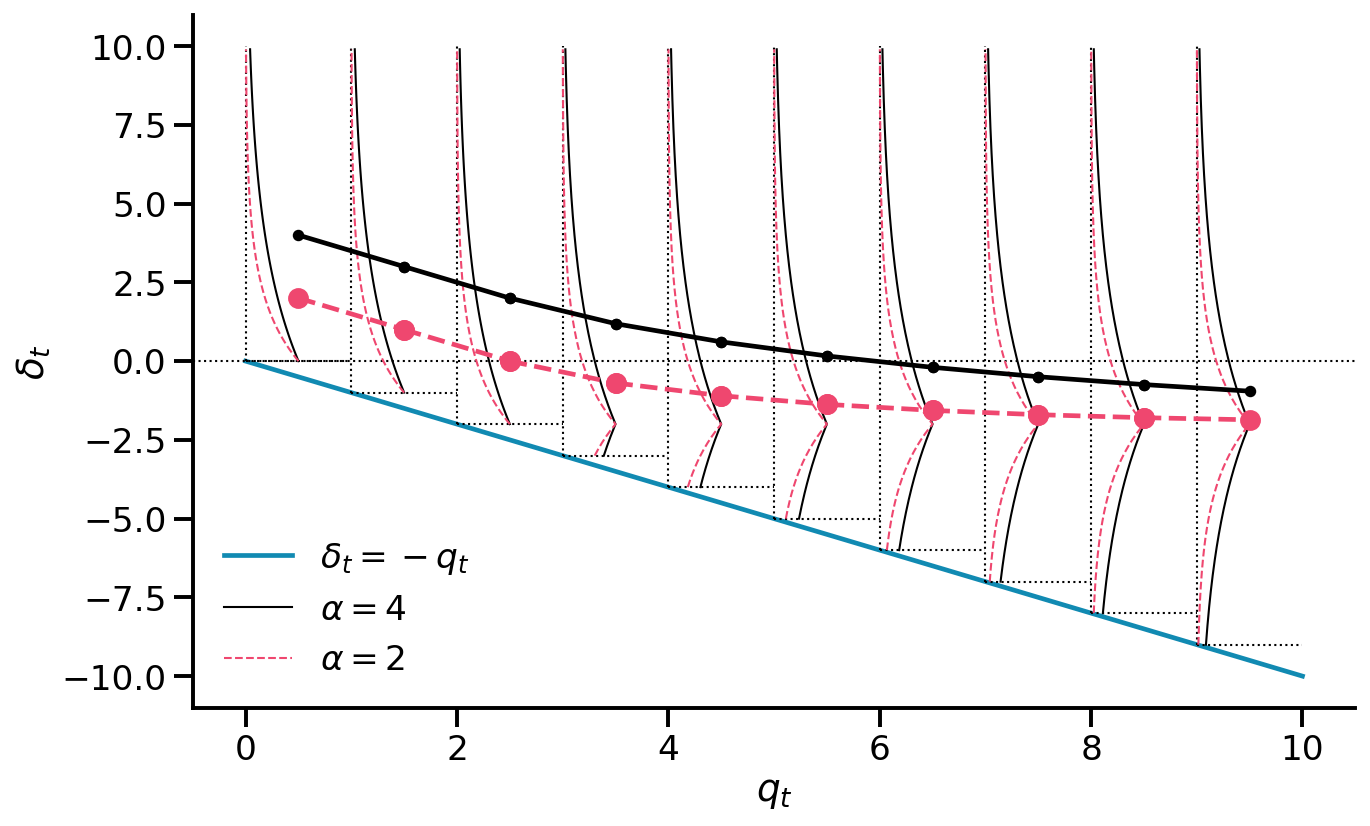

In [351]:
#q_t = np.linspace(0, 20, 3)

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=150)


upper = 10
step = 1
global_mode_fixed = -2

intervals = np.arange(0, upper, step)


ax.plot([0, step*(upper // step)], [0, -step*(upper // step)], color=colors[1], label="$\\delta_t = -q_t$")
ax.vlines(intervals, ymin=-intervals, ymax=upper, linestyle='dotted', lw=1, color='black')
ax.axhline(0, color='black', lw=1, linestyle='dotted')

ax.hlines(-intervals, xmin=intervals, xmax=intervals + step, color='black', lw=1, linestyle='dotted')

last_mu1 = None
last_mu2 = None

for interval in intervals:
    rv = laplace(loc=global_mode_fixed, scale=4)
    x = np.arange(-interval, upper, 0.1)
    y = rv.pdf(x)
    mu1 = trunc_laplace_expectation(4, max(interval + global_mode_fixed, 0)) - interval

    label1 = None
    label2 = None
    if interval == 0:
        label1 = "$\\alpha=4$"
        label2 = "$\\alpha=2$"
    ax.plot(interval + y / y.max() * step/2, x, color='black', lw=1, label=label1)

    rv = laplace(loc=global_mode_fixed, scale=2)
    y2 = rv.pdf(x)
    mu2 = trunc_laplace_expectation(2, max(interval + global_mode_fixed, 0)) - interval

    ax.plot(interval + y2 / y2.max() * step/2, x, color=colors[0], lw=1, linestyle='dashed', label=label2)
    
    # plot means
    #ax.hlines(mu1, xmin=interval + 2*step/3, xmax=interval + 2.5*step/3, color='black', lw=2)
    #ax.hlines(mu2, xmin=interval + 2*step/3, xmax=interval + 2.5*step/3, color=colors[0], linestyle='dashed', lw=2)
    
    if last_mu1 is not None:
        ax.plot([interval - step/2, interval + step/2], [last_mu1, mu1], color='black', marker='.')
        ax.plot([interval - step/2, interval + step/2], [last_mu2, mu2], color=colors[0], marker='o', linestyle='dashed')
        
    last_mu1 = mu1
    last_mu2 = mu2
    
ax.legend(loc='lower left', frameon=False)
ax.set_xlabel("$q_t$")
ax.set_ylabel("$\delta_t$")
sns.despine()